# VISTAB

Visualize or tabulate results.

In [3]:
from py_env_hpc import *

## 1. Visualize the IDEA!

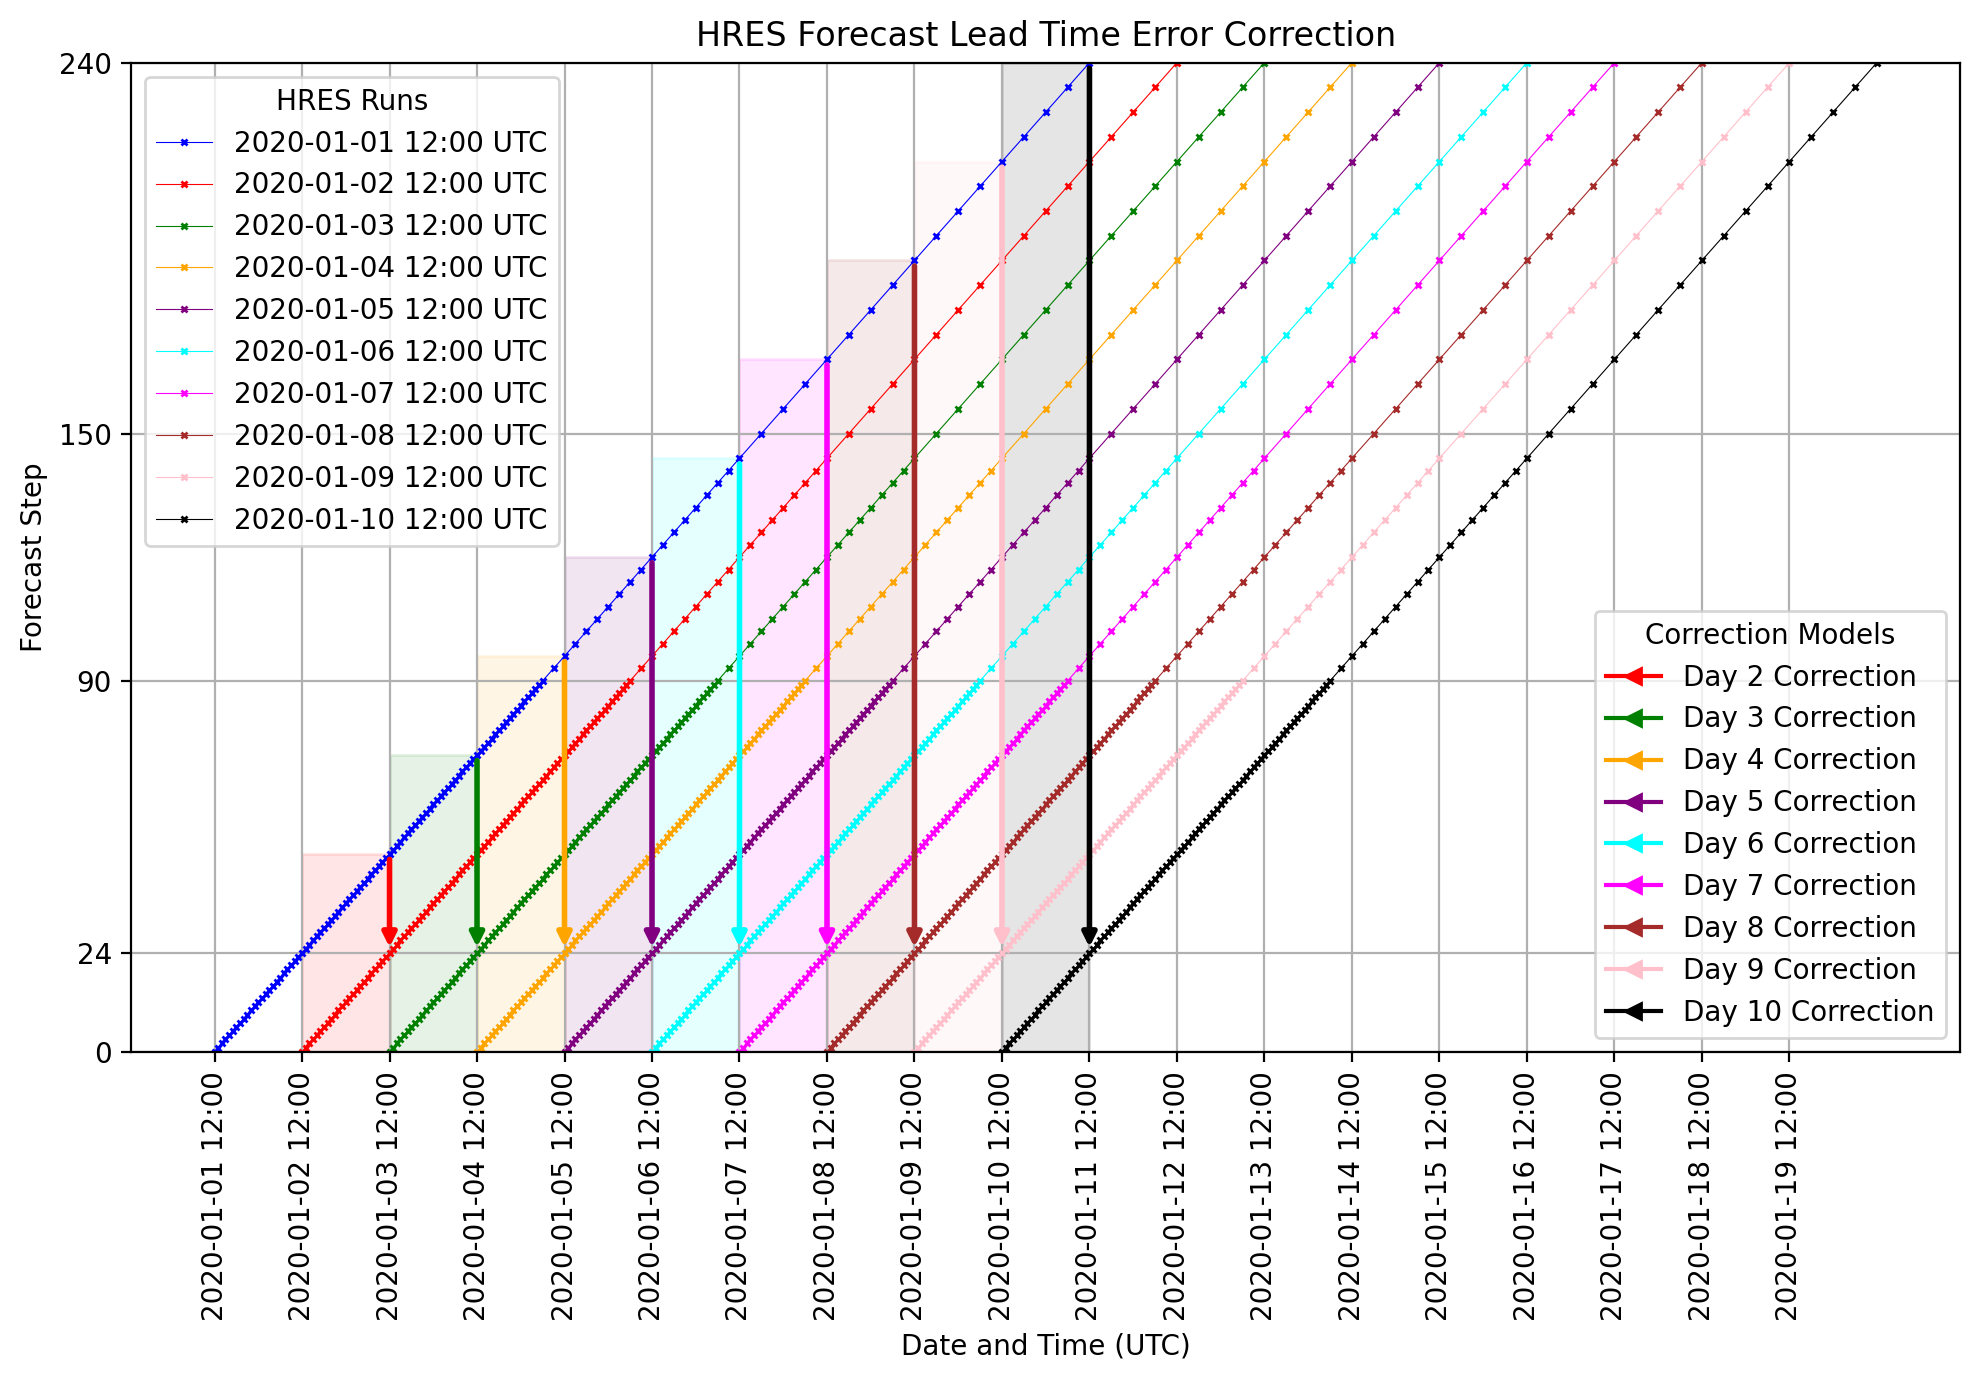

In [2]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from matplotlib.lines import Line2D
import numpy as np

def generate_forecast_times(start_date, forecast_steps):
    return [start_date + timedelta(hours=step) for step in forecast_steps]

def plot_forecast(run_times, forecast_steps, label, color):
    plt.plot(run_times, forecast_steps, marker='x', linestyle='-', color=color, label=label, ms=2, lw=0.4)

def set_plot_properties(start_date, end_date):
    plt.title('HRES Forecast Lead Time Error Correction')
    plt.xlabel('Date and Time (UTC)')
    plt.ylabel('Forecast Step')

    six_hourly_ticks = [start_date + timedelta(hours=i*24) for i in range(int((end_date - start_date).total_seconds() // 3600 // 24))]
    plt.xticks(six_hourly_ticks, [time.strftime('%Y-%m-%d %H:%M') for time in six_hourly_ticks], rotation=90)
    plt.ylim(0, 240)
    plt.yticks([0, 24, 90, 150, 240])
    plt.legend(title='HRES Runs', loc='upper left')
    plt.grid(True)
    plt.tight_layout()

# Define the starting date and time for each run
start_dates = [
    datetime(year=2020, month=1, day=1, hour=12),
    datetime(year=2020, month=1, day=2, hour=12),
    datetime(year=2020, month=1, day=3, hour=12),
    datetime(year=2020, month=1, day=4, hour=12),
    datetime(year=2020, month=1, day=5, hour=12),
    datetime(year=2020, month=1, day=6, hour=12),
    datetime(year=2020, month=1, day=7, hour=12),
    datetime(year=2020, month=1, day=8, hour=12),
    datetime(year=2020, month=1, day=9, hour=12),
    datetime(year=2020, month=1, day=10, hour=12)
]

# End date and time
end_date = datetime(year=2020, month=1, day=20, hour=12)

# Step frequency for 12 UTC for each run
forecast_steps = [list(range(0, 91)) + list(range(93, 145, 3)) + list(range(150, 241, 6)) for _ in range(10)]

# Calculate the date and time for each forecast step for each run
forecast_times = [generate_forecast_times(start_date, steps) for start_date, steps in zip(start_dates, forecast_steps)]

# Plotting the forecast steps against the corresponding times for each run
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'black']
labels = ['2020-01-01 12:00 UTC', '2020-01-02 12:00 UTC', '2020-01-03 12:00 UTC', '2020-01-04 12:00 UTC', '2020-01-05 12:00 UTC', '2020-01-06 12:00 UTC', '2020-01-07 12:00 UTC', '2020-01-08 12:00 UTC', '2020-01-09 12:00 UTC', '2020-01-10 12:00 UTC']

plt.figure(figsize=(10, 7), dpi=200)

for run_times, steps, label, color in zip(forecast_times, forecast_steps, labels, colors):
    plot_forecast(run_times, steps, label, color)

index_24 = 24

# Plot correction models
arrow_handles = []
for c, run_times in enumerate(forecast_times):
    correction_time = run_times[index_24]
    plt.annotate('', xy=(run_times[index_24], 240 + index_24 * (c - 9)), xytext=(run_times[index_24], index_24),
                 arrowprops=dict(arrowstyle='<|-', color=colors[c], linewidth=2),
                 annotation_clip=False)
    arrow_handles.append(Line2D([0], [0], linestyle='-', color=colors[c], marker='<', lw=1.5))
    
    if c >= 1:
        plt.axvspan(correction_time - timedelta(hours=24), correction_time, color=colors[c], alpha=0.1, ymax=(240 + index_24 * (c - 9)) / 240)

correction_labels = ['Day {} Correction'.format(day) for day in np.arange(2, 12)]

# Create a separate legend for correction arrows
arrow_legend = plt.legend(arrow_handles[1:], correction_labels, loc='lower right', title='Correction Models')
plt.gca().add_artist(arrow_legend)

set_plot_properties(start_dates[0], end_date)

# Save figure with white background
plt.savefig(DUMP_PLOT+'/idea.png')
plt.show()


## 1. Training results

In [48]:
df

Unnamed: 0      loss       mse  val_loss   val_mse        lr
0            0  1.166761  1.560506  0.274474  0.367101  0.010000
1            1  0.872436  1.166857  0.284436  0.380424  0.010000
2            2  0.830608  1.110913  0.570403  0.762896  0.010000
3            3  0.795318  1.063714  0.422716  0.565370  0.010000
4            4  0.811511  1.085372  0.249255  0.333372  0.010000
5            5  0.774060  1.035282  0.287815  0.384944  0.010000
6            6  0.755424  1.010356  0.222964  0.298208  0.010000
7            7  0.743389  0.994261  0.212669  0.284439  0.010000
8            8  0.750612  1.003921  0.303927  0.406493  0.010000
9            9  0.736404  0.984918  0.207786  0.277907  0.010000
10          10  0.729920  0.976246  0.261846  0.350210  0.010000
11          11  0.720532  0.963690  0.258128  0.345238  0.010000
12          12  0.713384  0.954129  0.329463  0.440647  0.010000
13          13  0.708247  0.947259  0.223249  0.298588  0.010000
14          14  0.684756  0.915840  0.223084  0.298368  0.005000
15          15  0.681349  0.911283  0.229743  0.307275  0.005000
16          16  0.678365  0.907292  0.230733  0.308599  0.005000
17          17  0.675202  0.903062  0.282714  0.378122  0.005000
18          18  0.651489  0.871347  0.173952  0.232655  0.002500
19          19  0.647822  0.866442  0.220487  0.294895  0.002500
20          20  0.646219  0.864299  0.268157  0.358652  0.002500
21          21  0.644070  0.861424  0.187035  0.250154  0.002500
22          22  0.639010  0.854656  0.458650  0.613430  0.002500
23          23  0.614868  0.822367  0.190645  0.254981  0.001250
24          24  0.605148  0.809367  0.277912  0.371699  0.001250
25          25  0.600439  0.803069  0.342945  0.458679  0.001250
26          26  0.596313  0.797551  0.366996  0.490845  0.001250
27          27  0.571059  0.763774  0.212058  0.283621  0.000625
28          28  0.562704  0.752599  0.272703  0.364732  0.000625
29          29  0.558904  0.747517  0.290077  0.387968  0.000625
30          30  0.555475  0.742930  0.295070  0.394647  0.000625
31          31  0.534593  0.715002  0.204899  0.274046  0.000313
32          32  0.528427  0.706755  0.226188  0.302519  0.000313
33          33  0.525586  0.702956  0.227785  0.304656  0.000313
34          34  0.522810  0.699242  0.226049  0.302333  0.000313

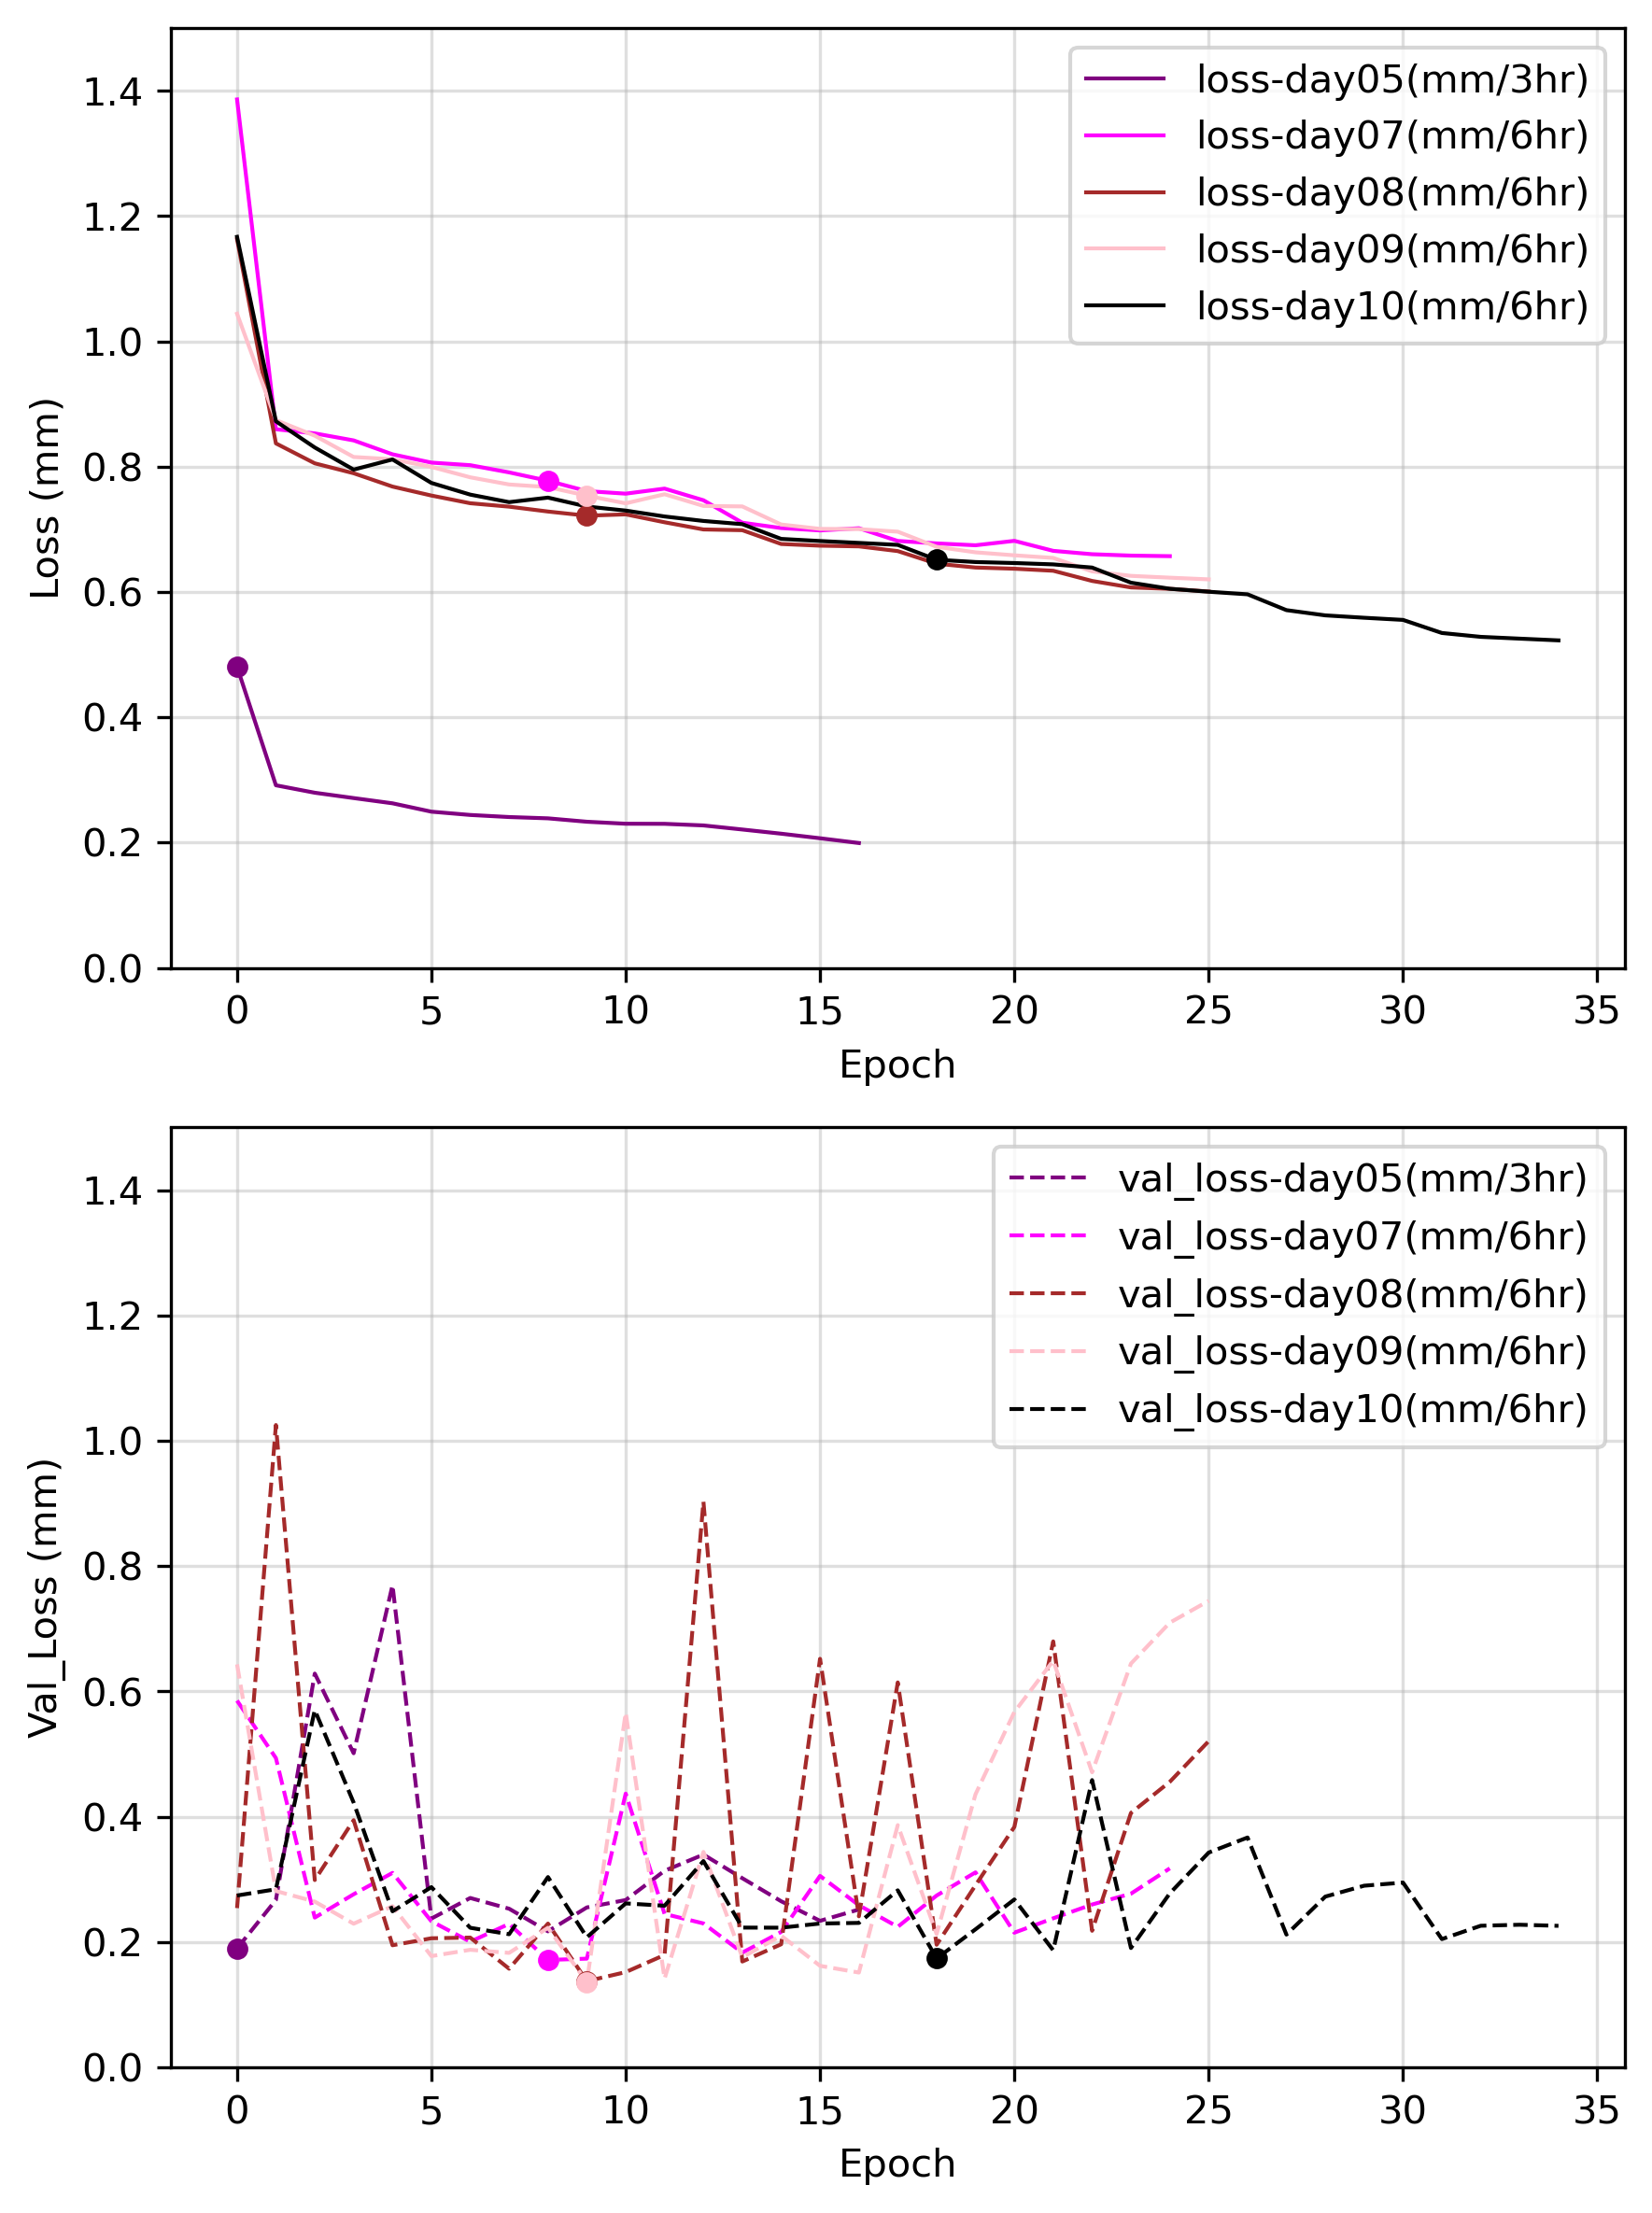

In [55]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to directory containing csv files
path_to_csv = PPROJECT_DIR2 + 'HPT/'

# Define colors list
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'black']

# Create dictionaries to map days to colors and units
day_colors = {
    '02': colors[1],
    '03': colors[2],
    '04': colors[3],
    '05': colors[4],
    '06': colors[5],
    '07': colors[6],
    '08': colors[7],
    '09': colors[8],
    '10': colors[9]
}

unit_labels = {
    '02': 'mm/hr',
    '03': 'mm/hr',
    '04': 'mm/hr',
    '05': 'mm/3hr',
    '06': 'mm/3hr',
    '07': 'mm/6hr',
    '08': 'mm/6hr',
    '09': 'mm/6hr',
    '10': 'mm/6hr'
}


# Create subplots for loss and val_loss
fig, axs = plt.subplots(2, 1, figsize=(6, 8), dpi=300)

# Iterate over each csv file in the directory
for filename in sorted(os.listdir(path_to_csv)):
    if filename.endswith(".csv"):
        # Extract day from filename
        day = filename[-6:-4]
        # Read csv file
        df = pd.read_csv(os.path.join(path_to_csv, filename))
        # Plot loss
        axs[0].plot(df['loss'], color=day_colors[day], label='loss-day{}({})'.format(day, unit_labels[day]), linewidth=1)
        # Plot val_loss
        axs[1].plot(df['val_loss'], linestyle='--', color=day_colors[day], label='val_loss-day{}({})'.format(day, unit_labels[day]), linewidth=1)
        # Find index of minimum val_loss for the day
        min_val_loss_index = df['val_loss'].idxmin()
        # Plot point at the minimum val_loss index
        axs[0].scatter(min_val_loss_index, df['loss'][min_val_loss_index], color=day_colors[day], marker='o', s=20, zorder=10)
        axs[1].scatter(min_val_loss_index, df['val_loss'][min_val_loss_index], color=day_colors[day], marker='o', s=20, zorder=10)

# Add grids to both subplots
axs[0].grid(True, alpha=0.4)
axs[1].grid(True, alpha=0.4)

axs[0].set_ylim(0, 1.5)
axs[1].set_ylim(0, 1.5)

# Add labels and legends to the subplots
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss (mm)')
axs[0].legend()
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Val_Loss (mm)')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Save figure with white background
plt.savefig(DUMP_PLOT+'/training_results.png', bbox_inches='tight', dpi=300, facecolor='white')
plt.show()


## 2. Forecast error correction results

In [6]:
# Define the error metrics, temporal resolutions, and seasons
from matplotlib.colors import LinearSegmentedColormap

# Define the plot ranges, units, and colormaps for each error metric and temporal resolution
plot_ranges = {
    ("ME", "hourly"): (-0.4, 0.4),
    ("ME", "daily"): (-4, 4),
    ("ME", "monthly"): (-100, 100),
    ("RMSE", "hourly"): (0, 2),
    ("RMSE", "daily"): (0, 6),
    ("RMSE", "monthly"): (0, 100),
    ("COR", "hourly"): (0, 1),
    ("COR", "daily"): (0, 1),
    ("COR", "monthly"): (0, 1),
}

units = {
    ("ME", "hourly"): "mm/hr",
    ("ME", "daily"): "mm/day",
    ("ME", "monthly"): "mm/month",
    ("RMSE", "hourly"): "mm/hr",
    ("RMSE", "daily"): "mm/day",
    ("RMSE", "monthly"): "mm/month",
    ("COR", "hourly"): "Hourly",
    ("COR", "daily"): "Daily",
    ("COR", "monthly"): "Monthly",
}

colormaps = {
    ("ME", "hourly"): plt.get_cmap("coolwarm", 8),
    ("ME", "daily"): plt.get_cmap("coolwarm", 8),
    ("ME", "monthly"): plt.get_cmap("coolwarm", 10),
    ("RMSE", "hourly"): plt.get_cmap("rainbow", 10),
    ("RMSE", "daily"): plt.get_cmap("rainbow", 12),
    ("RMSE", "monthly"): plt.get_cmap("rainbow", 10),
    ("COR", "hourly"): plt.get_cmap("rainbow", 10),
    ("COR", "daily"): plt.get_cmap("rainbow", 10),
    ("COR", "monthly"): plt.get_cmap("rainbow", 10),
}


# Define the plot ranges, units, and colormaps for each error metric and temporal resolution for improvement plots

plot_ranges_i = {
    ("ME", "hourly"): (-20, 20),
    ("ME", "daily"): (-20, 20),
    ("ME", "monthly"): (-20, 20),
    ("RMSE", "hourly"): (-20, 20),
    ("RMSE", "daily"): (-20, 20),
    ("RMSE", "monthly"): (-20, 20),
    ("COR", "hourly"): (-20, 20),
    ("COR", "daily"): (-20, 20),
    ("COR", "monthly"): (-20, 20),
}

units_i = {
    ("ME", "hourly"): "Improvement (%)",
    ("ME", "daily"): "Improvement (%)",
    ("ME", "monthly"): "Improvement (%)",
    ("RMSE", "hourly"): "Improvement (%)",
    ("RMSE", "daily"): "Improvement (%)",
    ("RMSE", "monthly"): "Improvement (%)",
    ("COR", "hourly"): "Improvement (%)",
    ("COR", "daily"): "Improvement (%)",
    ("COR", "monthly"): "Improvement (%)",
}

RGmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=8) 

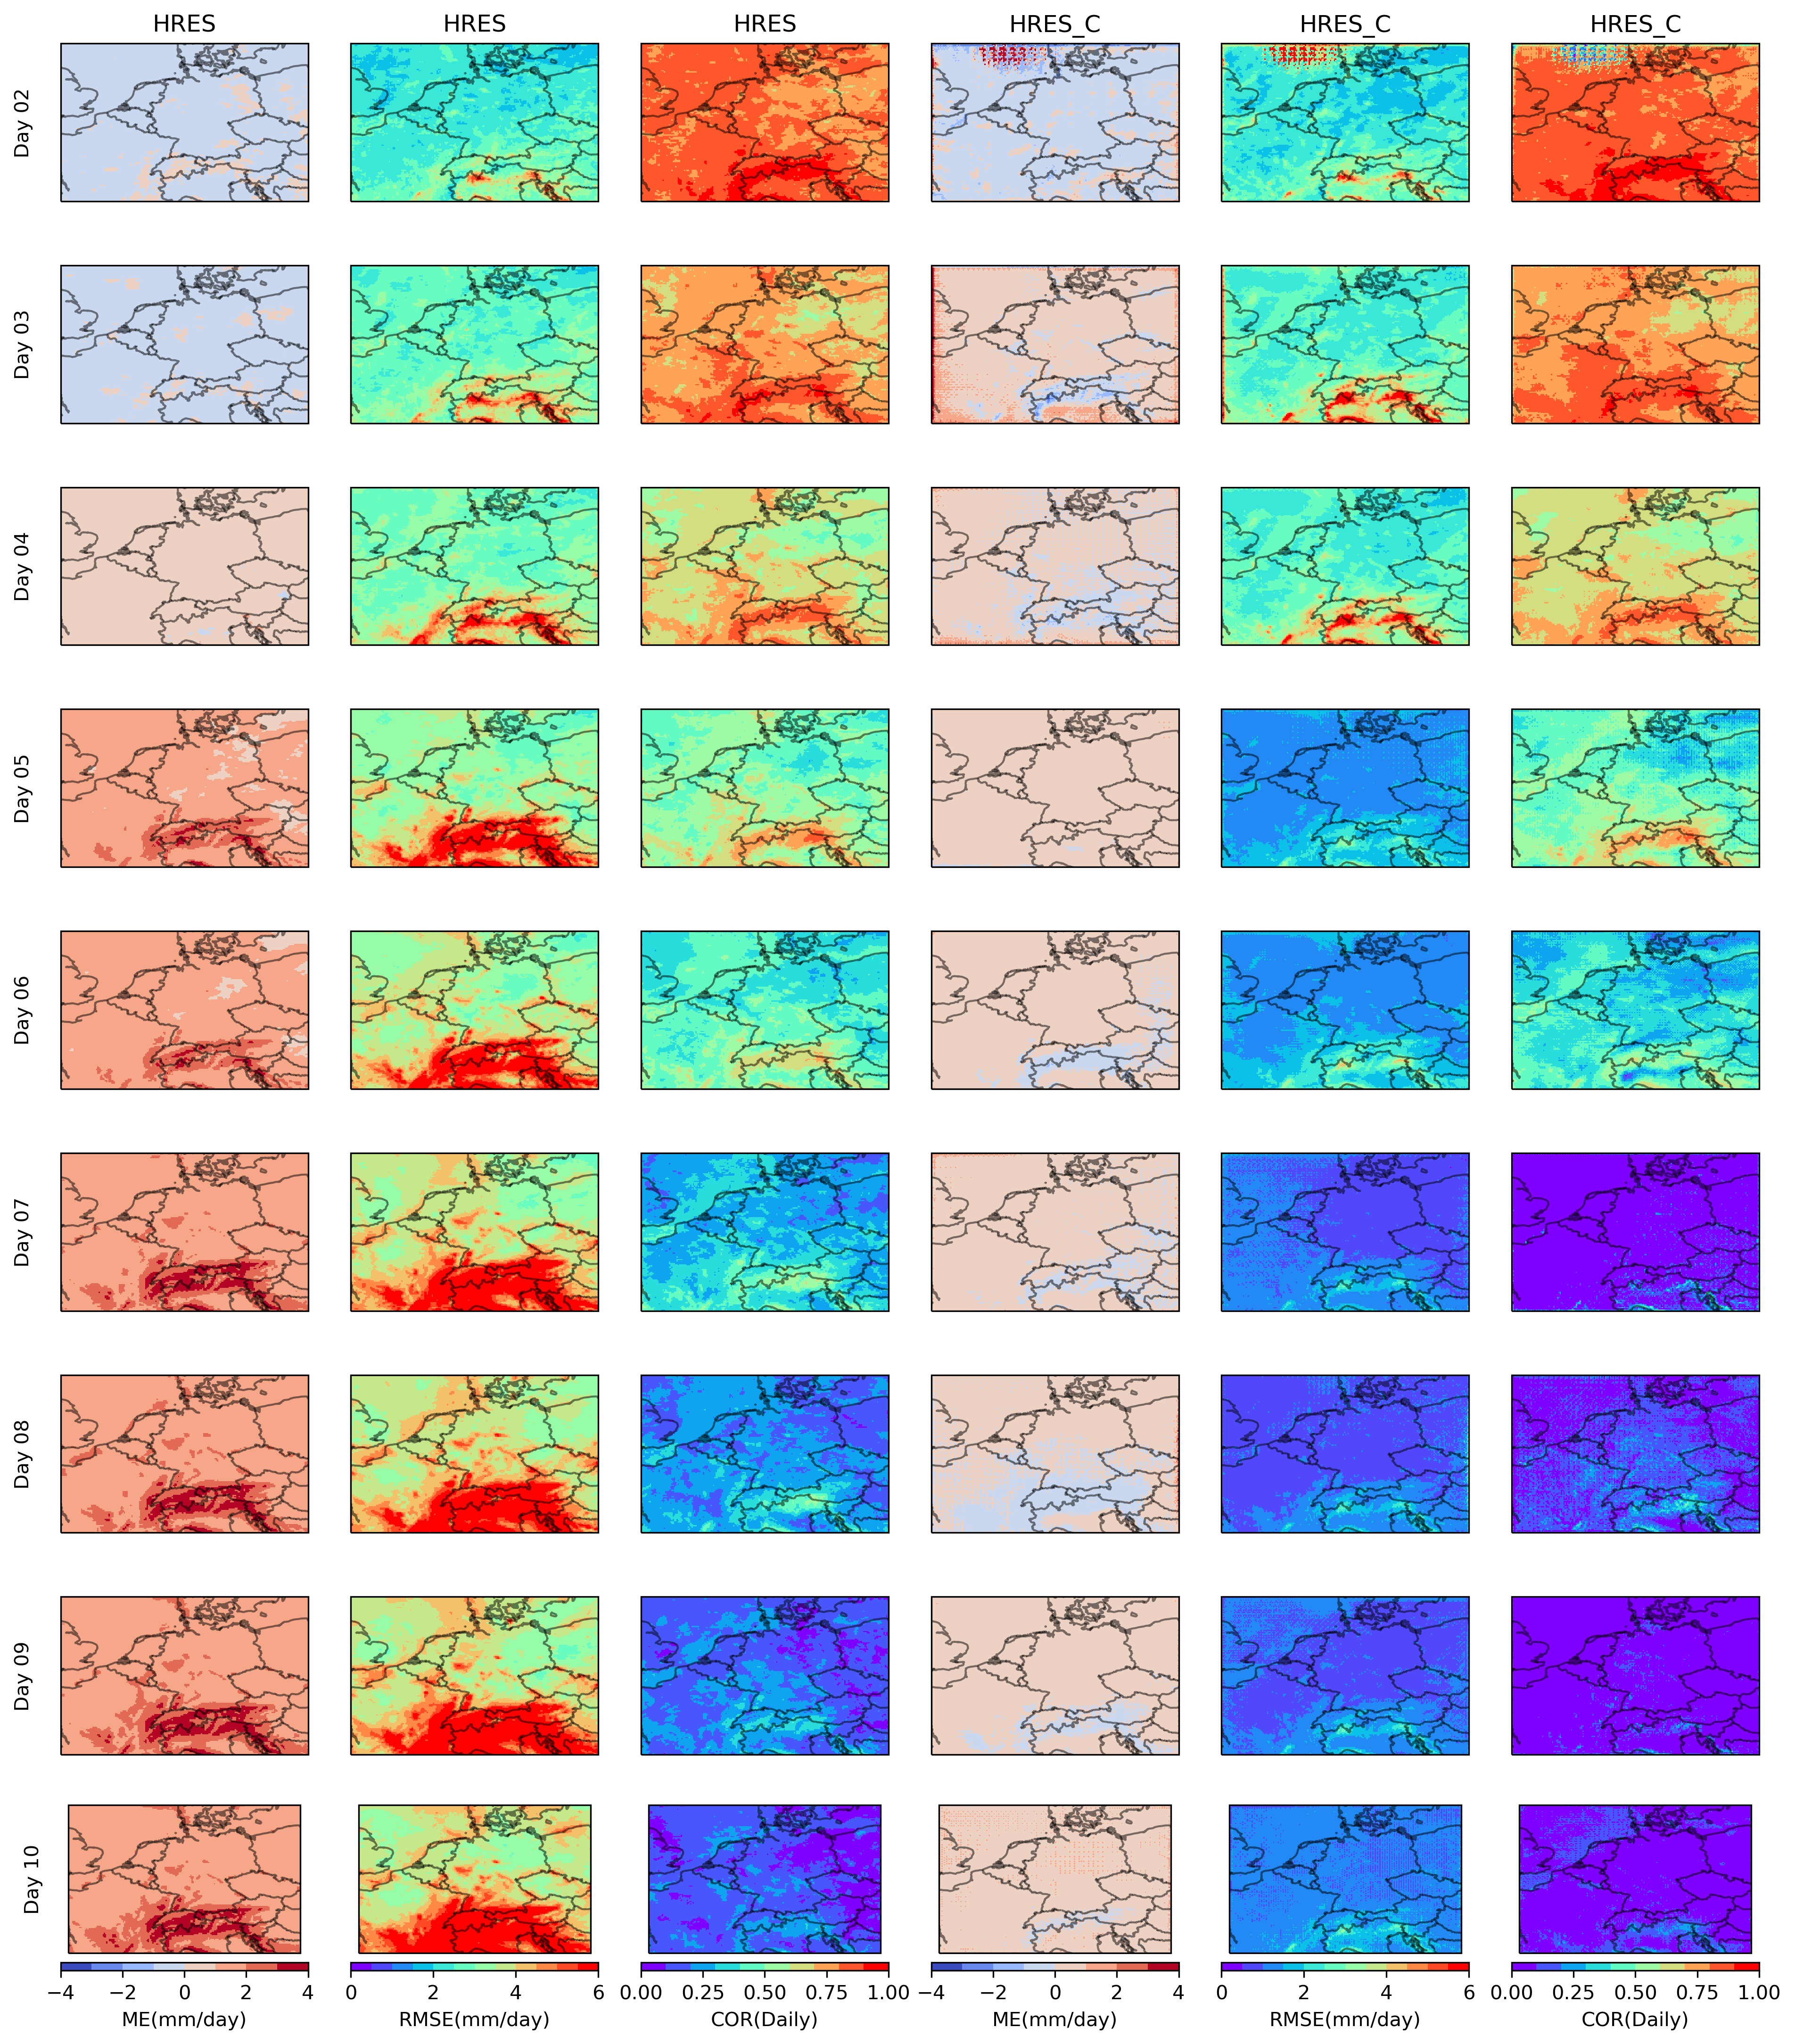

<Figure size 640x480 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.gridspec as gridspec

# Figure settings
fs = 1  # Scale for resizing the figure

lead_times = [f"{day:02d}" for day in range(2, 11)]
metric_labels = ['Mean Error', 'Root Mean Squared Error', 'Correlation Coefficient']
metrics_short = ['ME', 'RMSE', 'COR']
product_labels = ['HRES', 'HRES_C']
temporal_resolution = "daily"

# Define figure and axes using GridSpec
fig = plt.figure(figsize=(16 * fs, 18 * fs), dpi=300)
gs = gridspec.GridSpec(len(lead_times), len(metric_labels) * len(product_labels) + 1, width_ratios=[1] * (len(metric_labels) * len(product_labels)) + [0.05])

for i, lead_time in enumerate(lead_times):
    for j, product in enumerate(product_labels):
        for mm in range(3):  # Metrics
            metric_short = metrics_short[mm]
            metric = metric_labels[mm]
            
            # Read the data
            file_path = STATS + "/ADAPTER_DE05.day" + lead_time + "_" + product + "_stats.nc"
            if os.path.exists(file_path):
                data = xr.open_dataset(file_path)
                metric_data = data[metric].values
            else:
                print(file_path + " does not exist!")
            
            # Plot the data as map
            latitudes = data["latitude"].values
            longitudes = data["longitude"].values
            plot_range = plot_ranges[(metrics_short[mm], temporal_resolution)]
            unit = units[(metrics_short[mm], temporal_resolution)]
            cmap = colormaps[(metrics_short[mm], temporal_resolution)]
            
            ax = plt.subplot(gs[i, j * len(metric_labels) + mm], projection=ccrs.PlateCarree())
            
            ax.coastlines(resolution='auto', linestyle='-', alpha=0.5)  # Increase border line detail
            ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)  # Increase country border line detail
            im = ax.pcolormesh(longitudes, latitudes, metric_data, cmap=cmap, vmin=plot_range[0], vmax=plot_range[1], transform=ccrs.PlateCarree())
            
            if i == len(lead_times) - 1:  # Check if it's the last day
                # Add colorbar for the last day (day 10) to each ax individually
                cbar = plt.colorbar(im, ax=ax, orientation='horizontal', aspect=30, pad=0.05)
                cbar.set_label(f'{metric_short}({unit})')
            
            if i == 0:
                ax.set_title(f'{product}')
                
            if product == 'HRES' and metric_short == 'ME':
                ax.text(-0.15, 0.5, f'Day {lead_time}', rotation=90, va='center', ha='center', transform=ax.transAxes)            
            data.close()

# Show plot
plt.show()
plt.savefig(DUMP_PLOT+'/errors.png', dpi=300, facecolor='white')
plt.show()

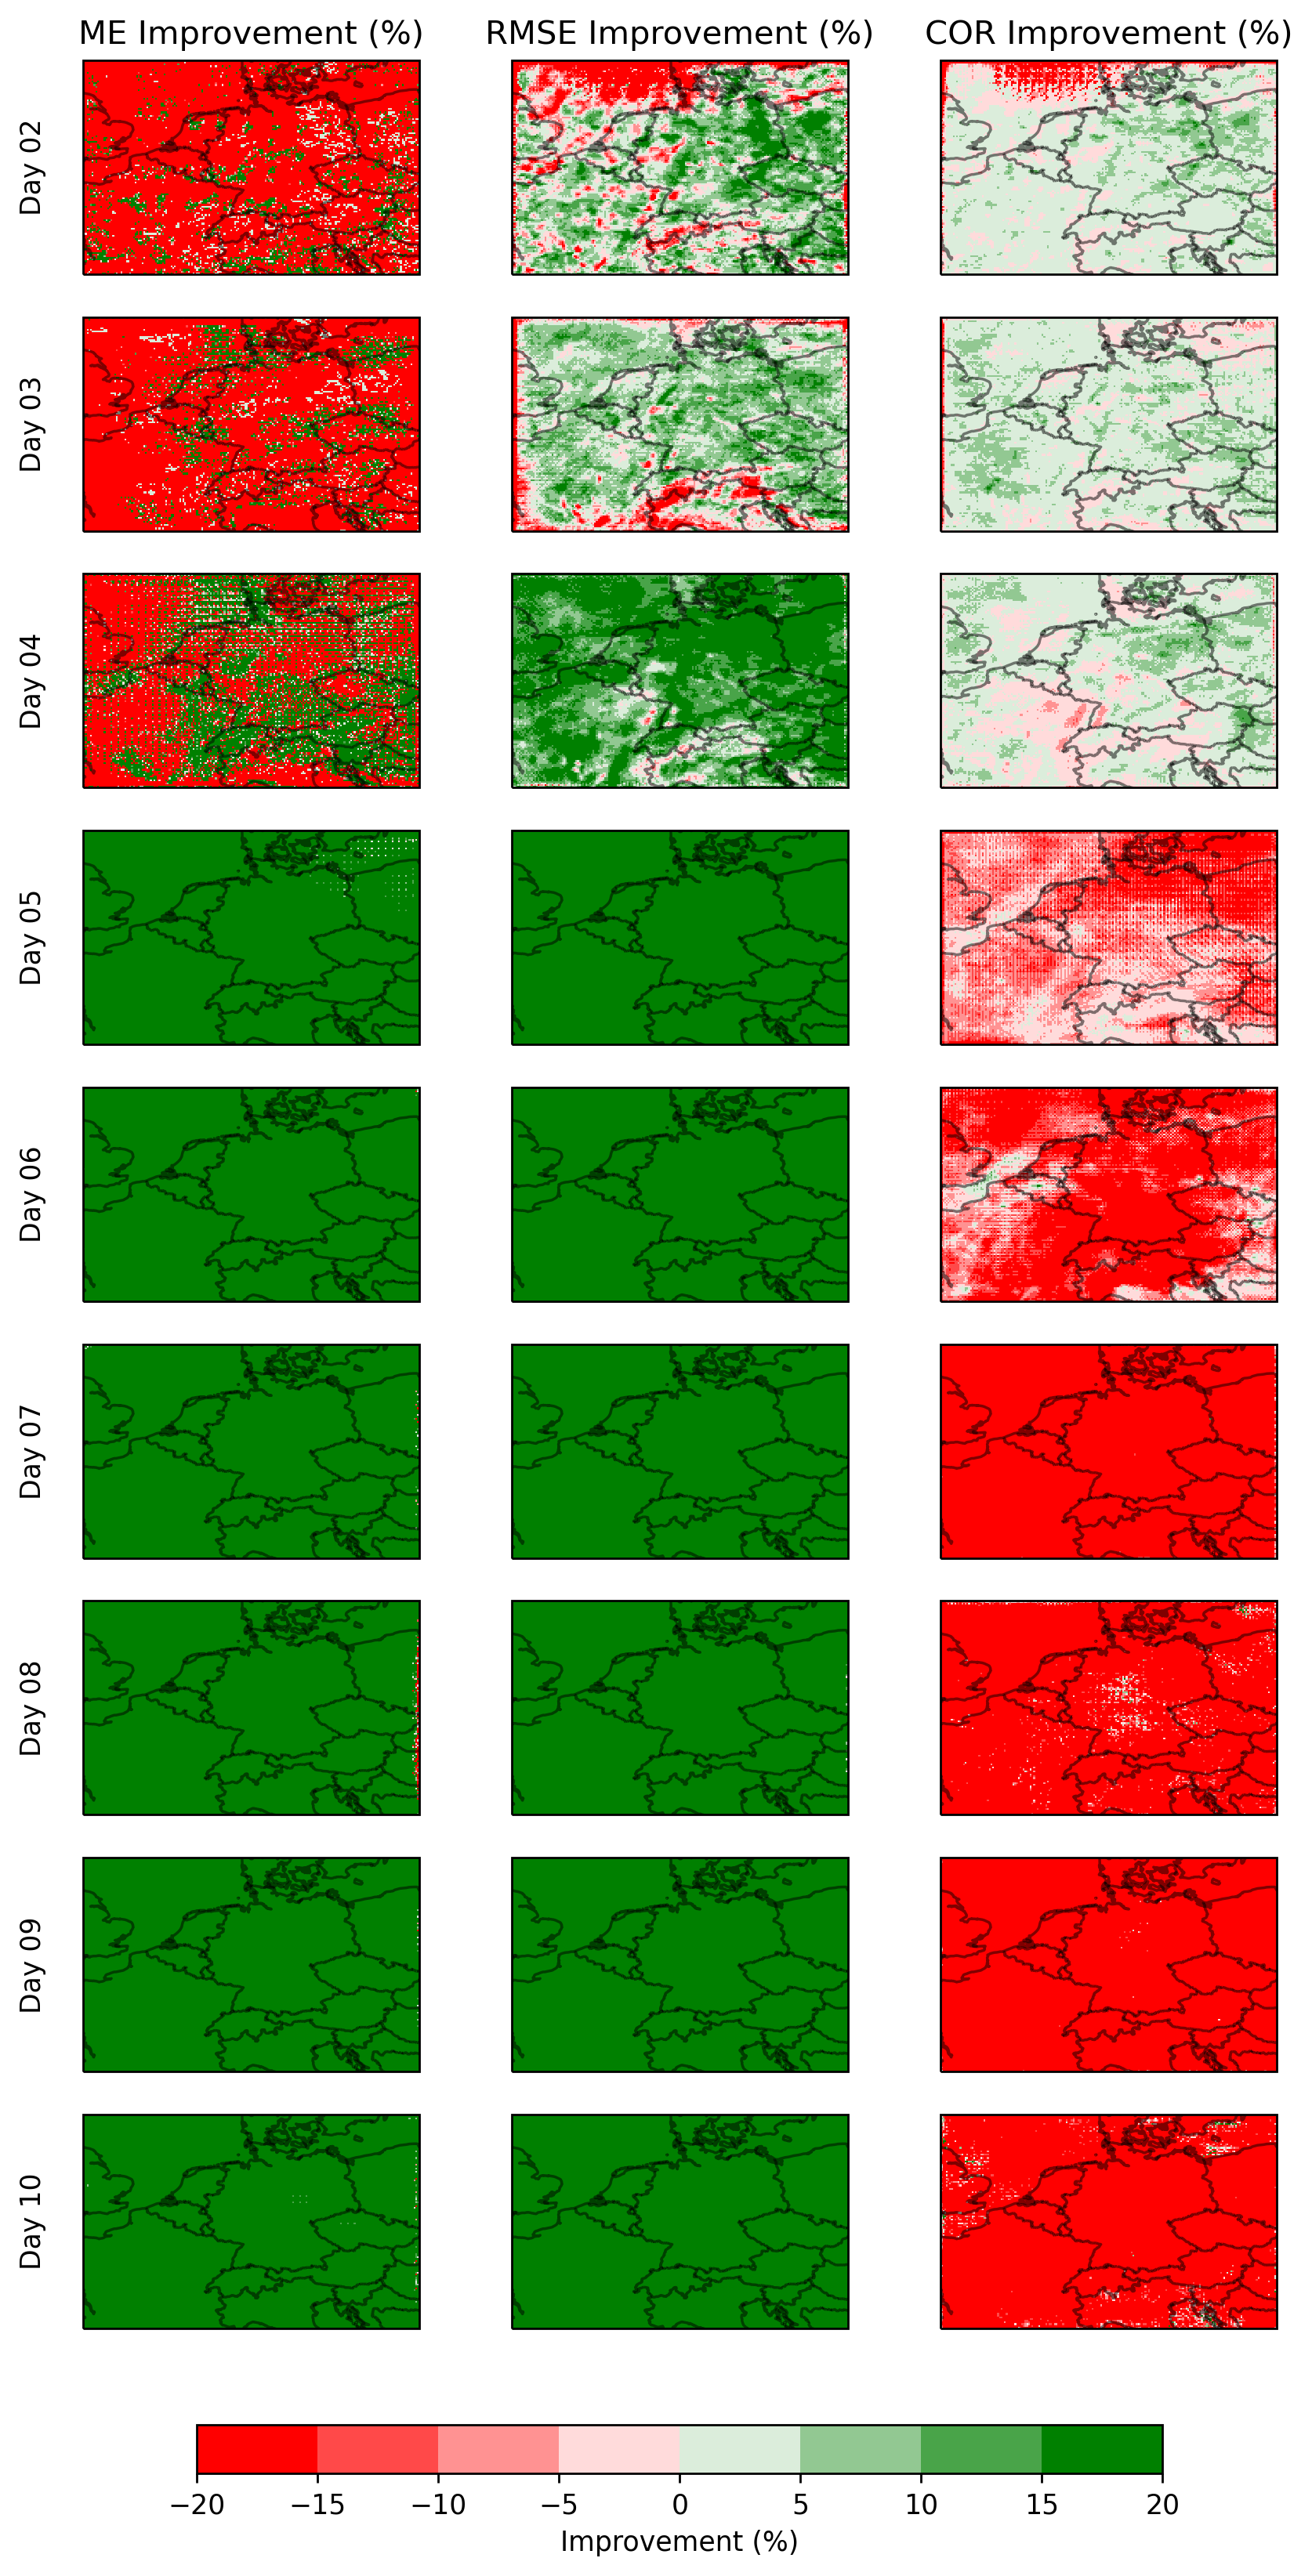

In [9]:
import matplotlib.pyplot as plt
import os
import xarray as xr
import numpy as np

#figure settings:
fs=1 #scale for resizing the figure

lead_times = [f"{day:02d}" for day in range(2, 11)]
metric_labels = ['Mean Error', 'Root Mean Squared Error', 'Correlation Coefficient']
metrics_short = ['ME', 'RMSE', 'COR']
product_labels = ['HRES', 'HRES_C']
temporal_resolution = "daily"

# Define figure and axes
fig, axs = plt.subplots(len(lead_times), len(metric_labels), figsize=(8 * fs, 16 * fs), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=250)

for i, lead_time in enumerate(lead_times):
    for mm in range(3):  # Metrics
        metric_short = metrics_short[mm]
        metric = metric_labels[mm]
        
        # File paths for HRES and HRES-C
        file_path_hres = f"{STATS}/ADAPTER_DE05.day{lead_time}_HRES_stats.nc"
        file_path_hres_c = f"{STATS}/ADAPTER_DE05.day{lead_time}_HRES_C_stats.nc"
        
        if os.path.exists(file_path_hres) and os.path.exists(file_path_hres_c):
            data_hres = xr.open_dataset(file_path_hres)
            data_hres_c = xr.open_dataset(file_path_hres_c)
            
            metric_data_hres = data_hres[metric].values
            metric_data_hres_c = data_hres_c[metric].values
            
            if metric_short in ['ME', 'RMSE']:
                # Calculate percentage reduction
                mask = np.abs(metric_data_hres) >= 0.01
                improvement = np.zeros_like(metric_data_hres)
                improvement[mask] = 100 * (np.abs(metric_data_hres[mask]) - np.abs(metric_data_hres_c[mask])) / np.abs(metric_data_hres[mask])
            else:  # COR
                # Calculate percentage improvement
                improvement = 100 * (metric_data_hres_c - metric_data_hres) / np.abs(metric_data_hres)
            
            latitudes = data_hres["latitude"].values
            longitudes = data_hres["longitude"].values
            plot_range = plot_ranges_i[(metric_short, "daily")]
            cmap = RGmap
            
            ax = axs[i, mm]
            ax.coastlines(resolution='auto', linestyle='-', alpha=0.5)
            ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
            im = ax.pcolormesh(longitudes, latitudes, improvement, cmap=cmap, vmin=plot_range[0], vmax=plot_range[1], transform=ccrs.PlateCarree())
            
            if i == 0:
                ax.set_title(f'{metric_short} Improvement (%)')
                
                            
            if metric_short == 'ME':
                ax.text(-0.15, 0.5, f'Day {lead_time}', rotation=90, va='center', ha='center', transform=ax.transAxes)            
            data.close()
                
            data_hres.close()
            data_hres_c.close()
        else:
            print(f"Files for lead time {lead_time} do not exist!")

# Add colorbar
cbar = fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.02, pad=0.04)
cbar.set_label('Improvement (%)')

# Show plot
plt.show()

## 3. Time-series and average maps

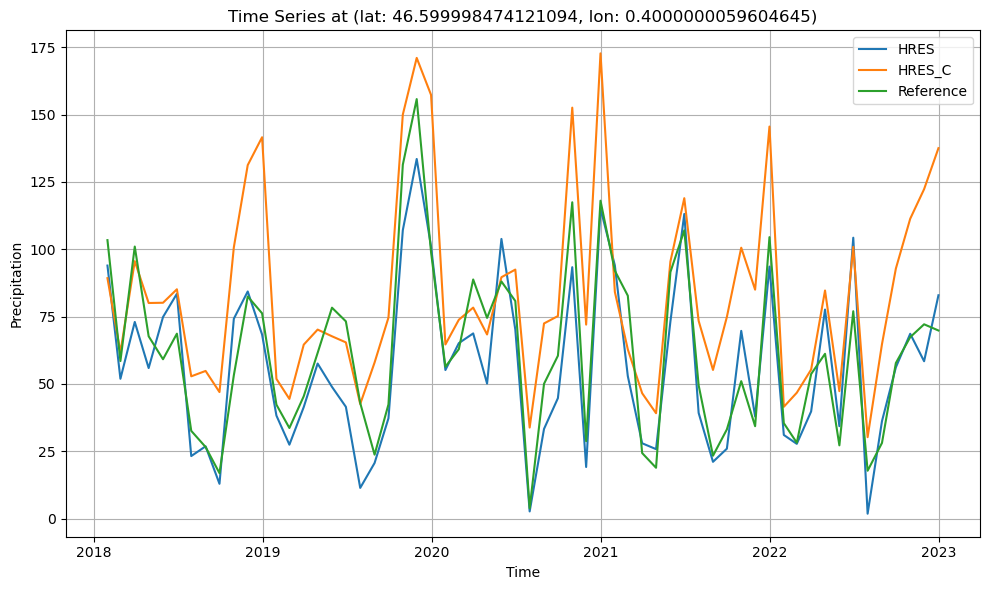

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Load datasets
lead_time = "03"
start_date = '2018-01-01'
end_date = '2023-12-31'

file_path_hres = f"{HRES_PREP}/ADAPTER_DE05.day{lead_time}.merged.nc"
file_path_hres_c = f"{PREDICT_FILES}/ADAPTER_DE05.day{lead_time}.merged.nc.corrected.nc"
file_path_ref = f"{HRES_PREP}/ADAPTER_DE05.day01.merged.nc"

data_hres = xr.open_dataset(file_path_hres)
data_hres_c = xr.open_dataset(file_path_hres_c)
data_ref = xr.open_dataset(file_path_ref)

# Select data for the year 2018
data_hres = data_hres.sel(time=slice(start_date, end_date))
data_hres_c = data_hres_c.sel(time=slice(start_date, end_date))
data_ref = data_ref.sel(time=slice(start_date, end_date))

# Align datasets according to reference
data_hres, data_hres_c, data_ref = xr.align(data_hres, data_hres_c, data_ref, join='inner')

# Resample datasets to daily frequency
data_hres_daily = data_hres.resample(time='1M').sum()
data_hres_c_daily = data_hres_c.resample(time='1M').sum()
data_ref_daily = data_ref.resample(time='1M').sum()

# Select a random point
np.random.seed(20)  # For reproducibility
latitudes = data_hres_daily.latitude.values
longitudes = data_hres_daily.longitude.values
random_lat = np.random.choice(latitudes)
random_lon = np.random.choice(longitudes)

# Extract time series data for the chosen point
time_series_hres = data_hres_daily.sel(latitude=random_lat, longitude=random_lon, method="nearest")
time_series_hres_c = data_hres_c_daily.sel(latitude=random_lat, longitude=random_lon, method="nearest")
time_series_ref = data_ref_daily.sel(latitude=random_lat, longitude=random_lon, method="nearest")

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(time_series_hres.time, time_series_hres.pr, label='HRES')
plt.plot(time_series_hres_c.time, time_series_hres_c.pr, label='HRES_C')
plt.plot(time_series_ref.time, time_series_ref.pr, label='Reference')

plt.title(f'Time Series at (lat: {np.round(random_lat, 2)}, lon: {np.round(random_lon, 2)})')
plt.xlabel('Time')
plt.ylabel('Precipitation')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

# Close datasets
data_hres.close()
data_hres_c.close()
data_ref.close()

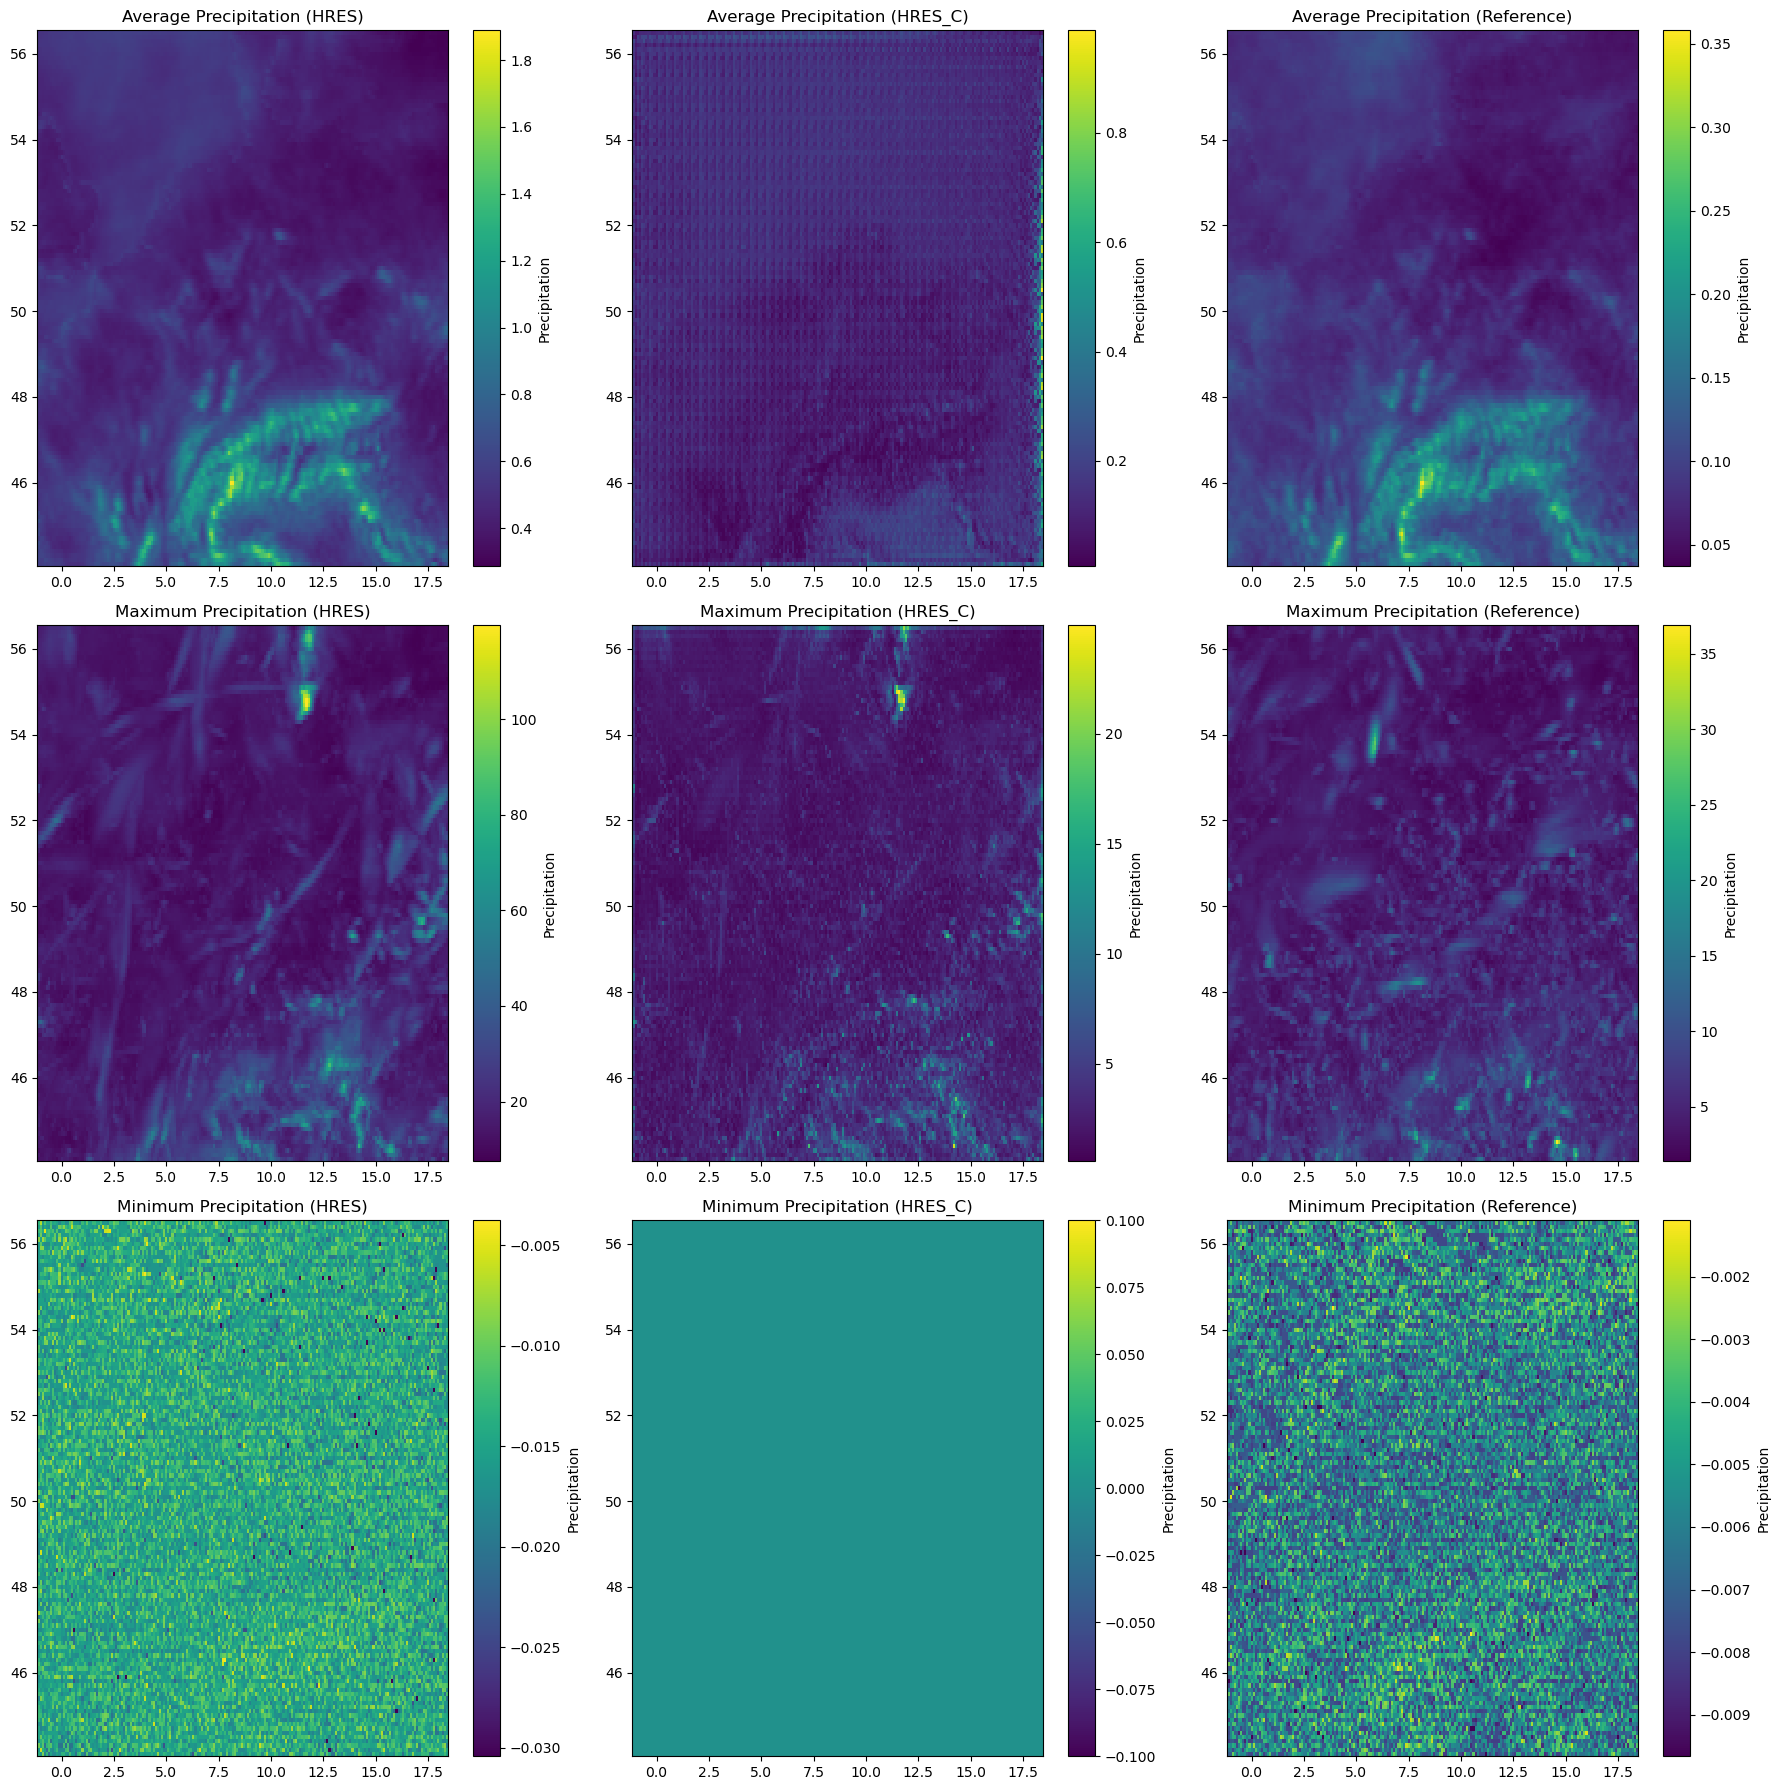

In [36]:
import xarray as xr
import matplotlib.pyplot as plt

# Define constants
lead_time = "08"
start_date = '2018-01-01'
end_date = '2018-12-31'
file_paths = {
    'HRES': f"{HRES_PREP}/ADAPTER_DE05.day{lead_time}.merged.nc",
    'HRES_C': f"{PREDICT_FILES}/ADAPTER_DE05.day{lead_time}.merged.nc.corrected.nc",
    'Reference': f"{HRES_PREP}/ADAPTER_DE05.day01.merged.nc"
}

# Load and select data
datasets = {name: xr.open_dataset(path).sel(time=slice(start_date, end_date)) for name, path in file_paths.items()}
datasets = xr.align(*datasets.values(), join='inner')

# Compute statistics
avg_precip = {name: ds.pr.mean(dim='time') for name, ds in zip(file_paths.keys(), datasets)}
max_precip = {name: ds.pr.max(dim='time') for name, ds in zip(file_paths.keys(), datasets)}
min_precip = {name: ds.pr.min(dim='time') for name, ds in zip(file_paths.keys(), datasets)}

# Plot data
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Plot average, maximum, and minimum precipitation
for i, (name, avg, max_p, min_p) in enumerate(zip(file_paths.keys(), avg_precip.values(), max_precip.values(), min_precip.values())):
    # Average Precipitation
    im1 = axes[0, i].pcolormesh(avg.longitude, avg.latitude, avg, cmap='viridis')
    axes[0, i].set_title(f'Average Precipitation ({name})')
    fig.colorbar(im1, ax=axes[0, i], orientation='vertical', label='Precipitation')

    # Maximum Precipitation
    im2 = axes[1, i].pcolormesh(max_p.longitude, max_p.latitude, max_p, cmap='viridis')
    axes[1, i].set_title(f'Maximum Precipitation ({name})')
    fig.colorbar(im2, ax=axes[1, i], orientation='vertical', label='Precipitation')

    # Minimum Precipitation
    im3 = axes[2, i].pcolormesh(min_p.longitude, min_p.latitude, min_p, cmap='viridis')
    axes[2, i].set_title(f'Minimum Precipitation ({name})')
    fig.colorbar(im3, ax=axes[2, i], orientation='vertical', label='Precipitation')

plt.tight_layout()
plt.show()

# Close datasets
for ds in datasets:
    ds.close()
